# Machine Learning 41 : **K-Means Clustering in Machine Learning**

## **1. Introduction to Clustering**

**Definition of Clustering:**
Clustering is a type of unsupervised machine learning technique used to group a set of data points into clusters such that points within the same cluster are more similar to each other than to points in other clusters.

**Why it is Unsupervised:**
Clustering is unsupervised because it does not require labeled data. The algorithm learns patterns and structures from the data itself without predefined categories.

**Importance and Applications:**

* **Data Exploration:** Understand patterns and structures in data.
* **Market Segmentation:** Identify customer groups with similar behavior.
* **Image Compression:** Reduce the number of colors in images using representative cluster centers.
* **Anomaly Detection:** Detect unusual data points that do not belong to any cluster.

## **2. Overview of K-Means Clustering**

**Objective:**
The goal of K-Means is to partition `n` data points into `K` clusters by minimizing the **within-cluster variance (inertia)**, i.e., the sum of squared distances between points and their respective cluster centroids.

**Intuition:**
K-Means divides data into K groups based on similarity so that:

* Points in the same cluster are highly similar.
* Points in different clusters are dissimilar.


## **3. Algorithm Steps (Step-by-Step)**

1. **Initialization:**

   * Choose `K` initial centroids (randomly or using heuristics like K-Means++).

2. **Assignment Step:**

   * Assign each data point to the nearest centroid using a distance metric (commonly Euclidean distance).

3. **Update Step:**

   * Recalculate each centroid as the mean of all points assigned to that cluster:

     $$
     \mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
     $$

4. **Iterative Process:**

   * Repeat the assignment and update steps until convergence:

     * Cluster assignments do not change, or
     * Change in centroids is below a threshold.

**Pseudocode:**

```
Initialize K centroids randomly
Repeat:
    Assign each point to the nearest centroid
    Update each centroid to the mean of assigned points
Until convergence
```


## **4. Mathematical Formulation**

**Objective Function (Inertia):**

$$
J = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

Where:

* $C_k$ = cluster k
* $x_i$ = data point
* $\mu_k$ = centroid of cluster k

**Distance Calculation:**

* Euclidean distance:

$$
d(x_i, \mu_k) = \sqrt{\sum_{j=1}^{m} (x_{ij} - \mu_{kj})^2}
$$

* Other metrics: Manhattan, Cosine similarity.

**Centroid Update:**

$$
\mu_k = \frac{\sum_{x_i \in C_k} x_i}{|C_k|}
$$


## **5. Choice of K (Number of Clusters)**

* **Elbow Method:** Plot inertia vs. K and select the point where decrease slows down (“elbow”).
* **Silhouette Score:** Measures how similar a point is to its cluster compared to other clusters.
* **Gap Statistic:** Compares total within-cluster variation to that of a random distribution.


## **6. Advantages and Limitations**

**Advantages:**

* Simple to implement and understand.
* Computationally efficient for large datasets.
* Scales well with number of data points.

**Limitations:**

* Sensitive to initial centroids (may converge to local minima).
* Assumes spherical clusters of similar size.
* Not robust to outliers or clusters of varying density.


## **7. Applications**

* **Market Segmentation:** Identify customer groups for targeted marketing.
* **Image Compression:** Reduce image size by clustering colors.
* **Document Clustering:** Organize news articles, blogs, or research papers.
* **Anomaly Detection:** Detect fraud or unusual events in datasets.


## **8. Comparison with Other Clustering Algorithms**

| Algorithm        | Key Difference                                                             |
| ---------------- | -------------------------------------------------------------------------- |
| **DBSCAN**       | Density-based, can find arbitrary-shaped clusters, robust to outliers.     |
| **Hierarchical** | Builds tree of clusters (dendrogram), no need to predefine K.              |
| **K-Means**      | Partitions data into K spherical clusters, sensitive to initial centroids. |


This explanation can be enhanced with **diagrams** showing:

* Data points and cluster centroids
* Iterative movement of centroids
* Elbow method graph



## **Example**

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# generate sample data
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=0)

In [3]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df

Feature_1  Feature_2
0     2.402380   1.107456
1     3.437618   0.261654
2     1.003725   4.191477
3     0.282561   4.772506
4     1.271351   1.892542
..         ...        ...
495   1.076274   4.684806
496   1.422490   1.389812
497  -2.064124   7.810620
498  -0.959587   9.491073
499   0.914339   4.550146

[500 rows x 2 columns]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [5]:
inertia = []
K_range = range(1, 11)

In [6]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [7]:
inertia

[999.9999999999999,
 444.8434814271495,
 223.51664545583353,
 90.20569984440861,
 78.76811387366183,
 66.7796104961325,
 56.98185813700993,
 54.437396114551426,
 46.069536070417,
 43.27428515082035]

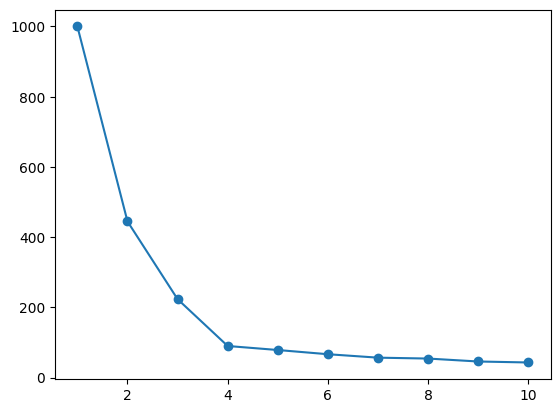

In [8]:
plt.plot(K_range, inertia, marker='o')

In [9]:
kmeans_final = KMeans(n_clusters=4, random_state=42)

In [10]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [11]:
df['cluster'] = cluster_labels

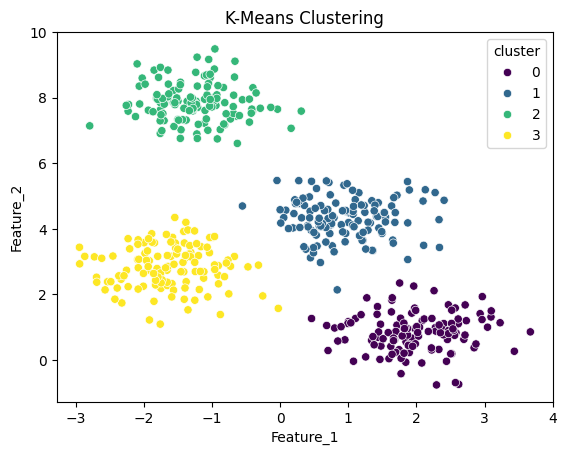

In [12]:
sns.scatterplot(x=df['Feature_1'],
                y=df['Feature_2'],
                hue=df['cluster'],
                palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Let's practice on diamond dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
data = sns.load_dataset('diamonds')
data.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [15]:
# Selecting relevant features
features = ['price', 'carat']
X = data[features]

In [16]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Using the Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)

In [18]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

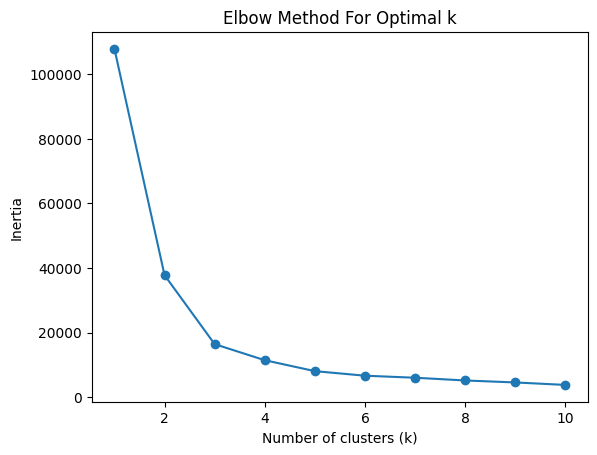

In [19]:
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [20]:
# From the elbow plot, let's assume the optimal number of clusters is 4
kmeans_final = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_scaled)
data['cluster'] = cluster_labels


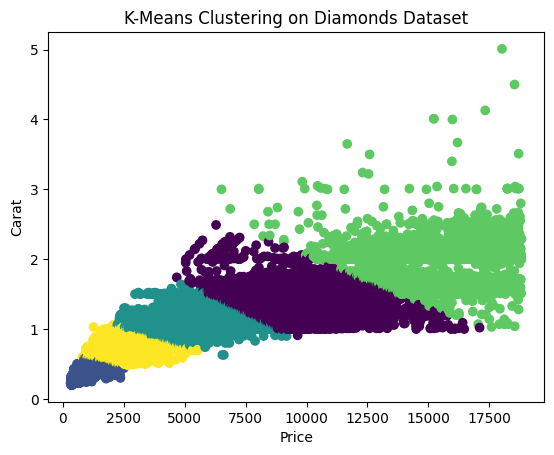

In [21]:
#plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels)
plt.xlabel("Price")
plt.ylabel("Carat")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

# lets change the number of clusters

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [23]:
diamonds = sns.load_dataset('diamonds')
diamonds

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [24]:
# Select relevant columns
X = diamonds[["carat", "price", "cut", "color", "clarity"]]
X.head()

carat  price      cut color clarity
0   0.23    326    Ideal     E     SI2
1   0.21    326  Premium     E     SI1
2   0.23    327     Good     E     VS1
3   0.29    334  Premium     I     VS2
4   0.31    335     Good     J     SI2

In [25]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)
X

carat  price  cut_Ideal  cut_Premium  cut_Very Good  cut_Good  \
0       0.23    326       True        False          False     False   
1       0.21    326      False         True          False     False   
2       0.23    327      False        False          False      True   
3       0.29    334      False         True          False     False   
4       0.31    335      False        False          False      True   
...      ...    ...        ...          ...            ...       ...   
53935   0.72   2757       True        False          False     False   
53936   0.72   2757      False        False          False      True   
53937   0.70   2757      False        False           True     False   
53938   0.86   2757      False         True          False     False   
53939   0.75   2757       True        False          False     False   

       cut_Fair  color_D  color_E  color_F  ...  color_I  color_J  clarity_IF  \
0         False    False     True    False  ...    False    False       False   
1         False    False     True    False  ...    False    False       False   
2         False    False     True    False  ...    False    False       False   
3         False    False    False    False  ...     True    False       False   
4         False    False    False    False  ...    False     True       False   
...         ...      ...      ...      ...  ...      ...      ...         ...   
53935     False     True    False    False  ...    False    False       False   
53936     False     True    False    False  ...    False    False       False   
53937     False     True    False    False  ...    False    False       False   
53938     False    False    False    False  ...    False    False       False   
53939     False     True    False    False  ...    False    False       False   

       clarity_VVS1  clarity_VVS2  clarity_VS1  clarity_VS2  clarity_SI1  \
0             False         False        False        False        False   
1             False         False        False        False         True   
2             False         False         True        False        False   
3             False         False        False         True        False   
4             False         False        False        False        False   
...             ...           ...          ...          ...          ...   
53935         False         False        False        False         True   
53936         False         False        False        False         True   
53937         False         False        False        False         True   
53938         False         False        False        False        False   
53939         False         False        False        False        False   

       clarity_SI2  clarity_I1  
0             True       False  
1            False       False  
2            False       False  
3            False       False  
4             True       False  
...            ...         ...  
53935        False       False  
53936        False       False  
53937        False       False  
53938         True       False  
53939         True       False  

[53940 rows x 22 columns]

In [26]:
# Instantiate a KMeans object with the number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the data to the KMeans algorithm
kmeans.fit(X)

KMeans(n_clusters=5)

In [27]:
# Get the predicted cluster labels for each data point
labels = kmeans.labels_

In [28]:
# Add predicted cluster labels as a new column to the original dataset
diamonds['labels'] = labels

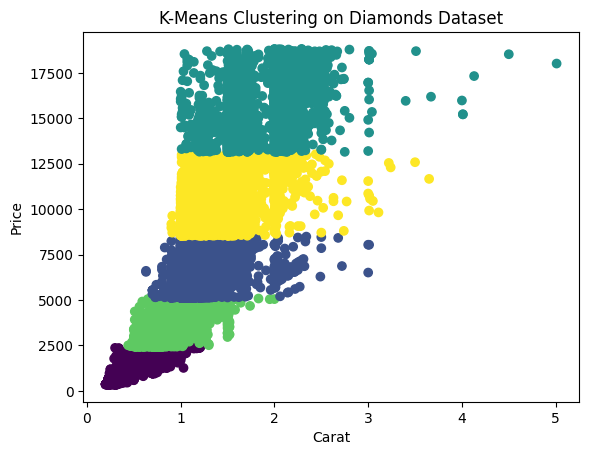

In [29]:
# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()

# **Model Evaluation** 
### 1. **Elbow Method**

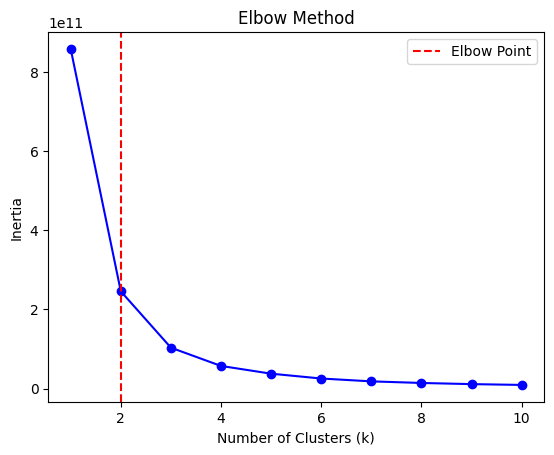

The best number of clusters based on the Elbow Method is: 2


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(1, 11)  # Test k from 1 to 10
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Find the elbow point
diff = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
best_k = diff.index(max(diff)) + 2

# Add a vertical line to indicate the elbow point
plt.axvline(x=best_k, color='r', linestyle='--', label='Elbow Point')

plt.legend()
plt.show()

print("The best number of clusters based on the Elbow Method is:", best_k)


### 2. **Silouette Method**

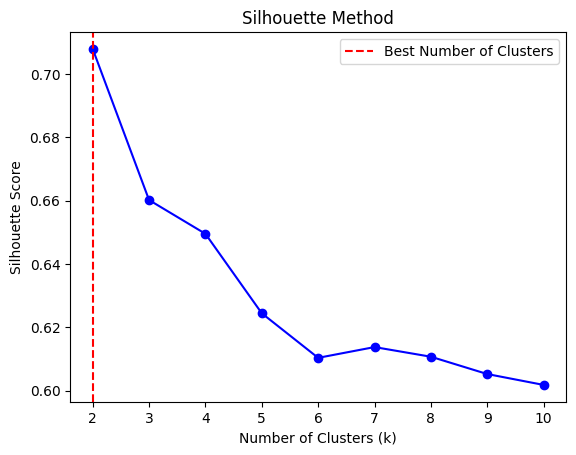

The best number of clusters based on the Silhouette Method is: 2


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering for different values of k
k_values = range(2, 11)  # Test k from 2 to 10
silhouette_scores = []  # List to store the silhouette scores

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
# Find the best number of clusters based on the Silhouette Method
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Add a vertical line to indicate the best number of clusters
plt.axvline(x=best_k, color='r', linestyle='--', label='Best Number of Clusters')

plt.legend()
plt.show()

print("The best number of clusters based on the Silhouette Method is:", best_k)

# Other evaluation methdos

1. **Calinski-Harabasz**
1. **Davies-Bouldin**
2. **Silhouette**
3. **Gap statistic**
4. **Bayesian information criterion (BIC)**

Many other can be seen from this [blog](https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad)


# **K-means++**

The main difference between K-means and K-means++ lies in the initialization of cluster centroids. The standard K-means algorithm initializes centroids randomly, while K-means++ improves this initialization by selecting centroids in a more strategic and probabilistic manner. Here are the key distinctions:

**Centroid Initialization:**

* K-means: In the original K-means algorithm, centroids are initialized randomly from the available data points.
* K-means++: The K-means++ algorithm initializes the first centroid randomly, but subsequent centroids are chosen based on the distances to previously selected centroids. Data points farther away from existing centroids have a higher probability of being chosen.

**Impact on Clustering Results:**

* K-means: The random initialization in K-means can lead to different clusterings each time the algorithm is run. It is more sensitive to the initial placement of centroids, and there is a higher chance of converging to suboptimal solutions.
* K-means++: By strategically initializing centroids, K-means++ mitigates the sensitivity to initialization. It encourages a more spread-out initialization, which typically leads to better cluster formation and more reliable results. K-means++ tends to produce more stable and consistent clusters across different runs.

**Convergence and Efficiency:**

* K-means: The random initialization in K-means may require more iterations to converge, as the initial centroids might be far from their optimal positions. It can result in slower convergence and higher computational costs.
* K-means++: The improved initialization in K-means++ often leads to faster convergence since the initial centroids are better positioned. It reduces the number of iterations required to achieve convergence and can improve the algorithm's efficiency.
* Overall, K-means++ is a modification of the standard K-means algorithm that provides a more effective and robust initialization scheme. By selecting initial centroids strategically, it enhances the quality of the clustering results and reduces sensitivity to the initial random initialization. K-means++ is widely used in practice as it improves the performance and stability of the K-means clustering algorithm.

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds dataset
df = sns.load_dataset('diamonds')

# Select relevant features for clustering
features = ['carat', 'depth', 'price']

# Extract the selected features from the dataset
X = df[features]

# Perform K-means clustering with K-means++
k = 3  # Number of clusters
kmeans_pp = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_pp.fit(X)

# Perform standard K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add cluster labels to the dataset
df['cluster_pp'] = kmeans_pp.labels_
df['cluster'] = kmeans.labels_

df.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   cluster_pp  cluster  
0           1        1  
1           1        1  
2           1        1  
3           1        1  
4           1        1

In [33]:
df.cluster.value_counts()

cluster
1    32851
2    15374
0     5715
Name: count, dtype: int64

In [34]:
df.cluster_pp.value_counts()

cluster_pp
1    32851
2    15374
0     5715
Name: count, dtype: int64

In [35]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cluster_pp', 'cluster'],
      dtype='object')

In [36]:
# let's use plotly and make plots

import plotly.express as px
fig = px.scatter(df, x='carat', y='price', color='cluster_pp')
fig.show()

In [37]:
# make a 3d plot in plotly
fig = px.scatter_3d(df, x='carat', y='depth', z='price', color='cluster_pp')
fig.show()

In [38]:
fig = px.parallel_coordinates(df, color='cluster_pp')
fig.show()

# Let's practice on IRIS dataset

In [39]:
df = sns.load_dataset('iris')
df.drop('species', axis=1, inplace=True)
df.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [40]:
# run kmeans clustering on df
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df)

# Add cluster labels to the dataset
df['cluster'] = kmeans.labels_

df.head()

sepal_length  sepal_width  petal_length  petal_width  cluster
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1
3           4.6          3.1           1.5          0.2        1
4           5.0          3.6           1.4          0.2        1

In [41]:
# let's use plotly and make plots

import plotly.express as px
fig = px.scatter(df, x='sepal_length', y='petal_length', color='cluster')
fig.show()

In [42]:
# let's use plotly and make plots
iris = sns.load_dataset('iris')
import plotly.express as px
fig = px.scatter(iris, x='sepal_length', y='petal_length', color='species')
fig.show()